In [1]:
import wikipedia as wk
import re
from IPython.core.display import clear_output

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
plt.style.use('ggplot')

In [3]:
sns.set(rc={'figure.figsize':(10.7,4.27)})

## Load dataframe

In [4]:
# raw_data
file = '04_clean_data_OCT_19.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [5]:
df= pd.read_csv(data_directory)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 6 columns):
name          284 non-null object
title         284 non-null object
summary       284 non-null object
year          284 non-null int64
transcript    284 non-null object
link          284 non-null object
dtypes: int64(1), object(5)
memory usage: 13.4+ KB


In [7]:
df.head()

,name,title,summary,year,transcript,link
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...
1,Ryan Hamilton,The Tonight Show Starring Jimmy Fallon,Ryan Hamilton makes his Tonight Show debut wit...,2019,"Published on Sep 11, 2019\nThe Tonight Show St...",https://scrapsfromtheloft.com/2019/09/25/ryan-...
2,Mark Normandthe Tonight Show Starring Jimmy Fa...,Mark Normand The Tonight Show Starring Jimmy ...,Mark Normand is back on The Tonight Show with ...,2019,"Aired on September 19, 2019\nHey, hey. All rig...",https://scrapsfromtheloft.com/2019/09/21/mark-...
3,George Carlin,Dumb Americans,"Full transcript of George Carlin's ""Dumb Ameri...",2006,From Life Is Worth Losing\nRecorded on Novembe...,https://scrapsfromtheloft.com/2019/09/12/georg...
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...


## Inspect Names

In [ ]:
df[40:60]

In [8]:
# fix Jeff Foxworthylarry The Cable Guy	 to just Jeff Foxworthy
# fix name
df.loc[50, 'name'] = 'Jeff Foxworthy'

In [9]:
df[45:51]

,name,title,summary,year,transcript,link
45,Ellen Degeneres,Relatable,"In her first special since 2003, Ellen revisit...",2018,A NETFLIX ORIGINAL COMEDY SPECIAL\n[crowd chee...,https://scrapsfromtheloft.com/2018/12/22/ellen...
46,Pete Holmes,Dirty Clean,The stand-up special Pete Holmes: Dirty Clean ...,2018,(crowd murmurs) Announcer: Ladies and gentleme...,https://scrapsfromtheloft.com/2018/12/19/pete-...
47,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...
48,Volker Pispers,About Usa,"Last part of Volker Pispers' program ""Bis neul...",2004,Last part of Volker Pispers’ program “Bis neul...,https://scrapsfromtheloft.com/2018/11/27/volke...
49,Trevor Noah,Son Of Patricia,"Trevor Noah gets out from behind the ""Daily Sh...",2018,A NETFLIX ORIGINAL COMEDY SPECIAL [distant tra...,https://scrapsfromtheloft.com/2018/11/21/trevo...
50,Jeff Foxworthy,We’Ve Been Thinking,Comedians Jeff Foxworthy and Larry the Cable G...,2016,When you start doing what Jeff and I do this i...,https://scrapsfromtheloft.com/2018/10/28/jeff-...


## Get len of transcript

In [10]:
df['len_transcript'] = df.transcript.str.len()

In [11]:
df.len_transcript.describe()

count      284.000000
mean     44476.133803
std      17255.660658
min       2491.000000
25%      38265.000000
50%      46805.000000
75%      55752.750000
max      86391.000000
Name: len_transcript, dtype: float64

In [12]:
df.head()

,name,title,summary,year,transcript,link,len_transcript
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937
1,Ryan Hamilton,The Tonight Show Starring Jimmy Fallon,Ryan Hamilton makes his Tonight Show debut wit...,2019,"Published on Sep 11, 2019\nThe Tonight Show St...",https://scrapsfromtheloft.com/2019/09/25/ryan-...,5040
2,Mark Normandthe Tonight Show Starring Jimmy Fa...,Mark Normand The Tonight Show Starring Jimmy ...,Mark Normand is back on The Tonight Show with ...,2019,"Aired on September 19, 2019\nHey, hey. All rig...",https://scrapsfromtheloft.com/2019/09/21/mark-...,5544
3,George Carlin,Dumb Americans,"Full transcript of George Carlin's ""Dumb Ameri...",2006,From Life Is Worth Losing\nRecorded on Novembe...,https://scrapsfromtheloft.com/2019/09/12/georg...,12598
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486


Text(0.5, 1.0, 'length of Transcript Distribution')

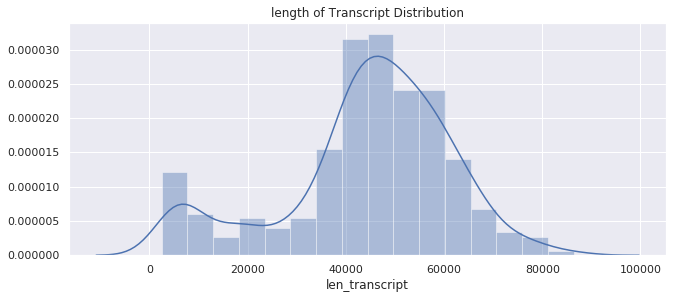

In [13]:
sns.distplot(df.len_transcript)
plt.title('length of Transcript Distribution')

## drop any transcripts < 20000
Lets only select transcripts that are 20K words or longer

In [15]:
large_transcripts = df.len_transcript>= 20000

In [16]:
df = df[large_transcripts]

Text(0.5, 1.0, 'length of Transcript Distribution')

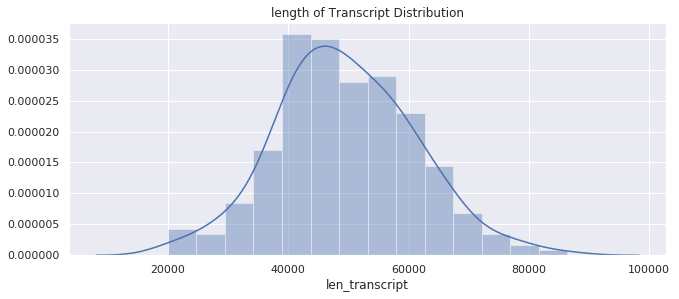

In [17]:
sns.distplot(df.len_transcript)
plt.title('length of Transcript Distribution')

In [18]:
df.head()

,name,title,summary,year,transcript,link,len_transcript
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937
4,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486
6,Amazon Rainforestclimate Changedeforestationha...,"Brazil, Corruption And The Amazon Rainforest |...",Hasan explains why Brazil's Trump-like preside...,0,"On this episode of Patriot Act, Hasan breaks d...",https://scrapsfromtheloft.com/2019/08/26/brazi...,20019
7,Dave Chappelle,Sticks & Stones,Legendary comedian Dave Chappelle is back with...,2019,Sticks & Stones is Dave Chappelle’s fifth Netf...,https://scrapsfromtheloft.com/2019/08/26/dave-...,42293
8,Emily Heller,Ice Thickeners,"Emily Heller compares Donald Trump to Air Bud,...",2019,"Emily Heller compares Donald Trump to Air Bud,...",https://scrapsfromtheloft.com/2019/08/25/emily...,44383


## Extract DOB from wikipedia

In [26]:
def get_bday_wiki_rx(data):
    '''call wikipedia API to extract DOB from summary'''
    pat = r'(\d{2}\s[A-z]+\s|[A-z]+\s\d{2},?\s)?\d{4}'
    pattern = re.compile(pat,re.IGNORECASE|re.VERBOSE)
    name = data['name']
    print('bday extraction: {}'.format(name))
    clear_output(wait = True)
    try:
        page = wk.page(name)
        result = pattern.search(page.content).group()
        return result
    except:
        print('Some error.')

## Extract Sex from wikipedia

In [27]:
def get_sex_wiki_rx(data):
    '''call wikipedia API to extact sex of person
    by searching how they are described'''
    pat = r'(He|She)'
    pattern = re.compile(pat,re.IGNORECASE|re.VERBOSE)
    name= data['name']
    print('sex extraction: {}'.format(name))
    clear_output(wait = True)
    try:
        page = wk.page(name)
        result = pattern.search(page.content).group()
        result = result.title()
        if result == 'She':
            return 'Female'
        elif result == 'He':
            return 'Male'
        else:
            return 'Unk'
    except:
        print('Some error')

## Apply functions

In [21]:
len(df.name.value_counts(dropna=False))

129

In [22]:
len(df)

248

In [23]:
name_list = list(df.name.unique())

In [24]:
len(name_list)

129

In [25]:
name_df = pd.DataFrame(name_list) 
name_df.rename(columns={0:'name'}, inplace=True)
name_df.head()

,name
0,Nikki Glaser
1,Bill Burr
2,Amazon Rainforestclimate Changedeforestationha...
3,Dave Chappelle
4,Emily Heller


## Get DOB
- 129 comedians
- ~ 3 minutes

In [28]:
%%time
name_df['dob'] = name_df.apply(get_bday_wiki_rx,axis=1)

CPU times: user 6.84 s, sys: 1.56 s, total: 8.41 s
Wall time: 2min 52s


In [30]:
name_df.dob.value_counts(dropna=False)[:10]

1971    4
NaN     3
1970    3
1966    3
1964    3
1974    2
2017    2
1981    2
1955    2
1979    2
Name: dob, dtype: int64

## Check null values

In [31]:
name_df.apply(lambda x: sum(x.isnull()))

name    0
dob     3
dtype: int64

In [32]:
name_df.head()

,name,dob
0,Nikki Glaser,1984
1,Bill Burr,"June 10, 1968"
2,Amazon Rainforestclimate Changedeforestationha...,None
3,Dave Chappelle,"August 24, 1973"
4,Emily Heller,1985


In [33]:
name_df[name_df.isnull().any(axis=1)]

,name,dob
2,Amazon Rainforestclimate Changedeforestationha...,None
54,Deray Davis,None
108,Erik Griffin,None


## update null dob's

In [34]:
# Deray Davis
name_df.loc[54, 'dob'] = 'February 26, 1968'
# Erik Griffin
name_df.loc[108, 'dob'] = 'March 26, 1976'

In [35]:
name_df.apply(lambda x: sum(x.isnull()))

name    0
dob     1
dtype: int64

## Get sex value
- ~ 2 minutes

In [36]:
%%time
name_df['sex'] = name_df.apply(get_sex_wiki_rx,axis=1)

CPU times: user 4.89 s, sys: 1.5 s, total: 6.39 s
Wall time: 1min 46s


In [37]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
name    129 non-null object
dob     128 non-null object
sex     128 non-null object
dtypes: object(3)
memory usage: 3.1+ KB


In [38]:
name_df.sex.value_counts(dropna=False)

Male      116
Female     12
NaN         1
Name: sex, dtype: int64

In [39]:
name_df.head()

,name,dob,sex
0,Nikki Glaser,1984,Female
1,Bill Burr,"June 10, 1968",Male
2,Amazon Rainforestclimate Changedeforestationha...,None,None
3,Dave Chappelle,"August 24, 1973",Male
4,Emily Heller,1985,Male


In [40]:
name_df.drop([2],inplace=True)

In [41]:
name_df.head()

,name,dob,sex
0,Nikki Glaser,1984,Female
1,Bill Burr,"June 10, 1968",Male
3,Dave Chappelle,"August 24, 1973",Male
4,Emily Heller,1985,Male
5,David Cross,1964,Male


## Fix DOB

In [42]:
name_df[name_df.isnull().any(axis=1)]

,name,dob,sex


In [43]:
# change to datetime
name_df.dob = pd.to_datetime(name_df.dob)

In [44]:
name_df.head()

,name,dob,sex
0,Nikki Glaser,1984-01-01,Female
1,Bill Burr,1968-06-10,Male
3,Dave Chappelle,1973-08-24,Male
4,Emily Heller,1985-01-01,Male
5,David Cross,1964-01-01,Male


## Merge dataframes

In [46]:
df = pd.merge(df,name_df,on='name')

In [47]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984-01-01,Female
1,Nikki Glaser,Perfect,Nikki Glaser brings her sharp wit to her first...,2016,"* * Ooh, ooh, ooh, ooh, ooh, ooh, ooh, ooh * *...",https://scrapsfromtheloft.com/2018/05/16/nikki...,59586,1984-01-01,Female
2,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,1968-06-10,Male
3,Bill Burr,Why Do I Do This Testo Italiano Completo,"Va bene, grazie, grazie mille. Va bene, Gesù. ...",2008,"Va bene, grazie, grazie mille. Va bene, Gesù. ...",https://scrapsfromtheloft.com/2017/09/08/bill-...,45505,1968-06-10,Male
4,Bill Burr,I’M Sorry You Feel That Way,"[cheers and applause] All right, thank you! Th...",2014,"[cheers and applause] All right, thank you! Th...",https://scrapsfromtheloft.com/2017/05/24/bill-...,64608,1968-06-10,Male


## Check null values

In [48]:
df.apply(lambda x: sum(x.isnull()))

name              0
title             0
summary           0
year              0
transcript        0
link              0
len_transcript    0
dob               0
sex               0
dtype: int64

In [49]:
df[df.isnull().any(axis=1)]

,name,title,summary,year,transcript,link,len_transcript,dob,sex


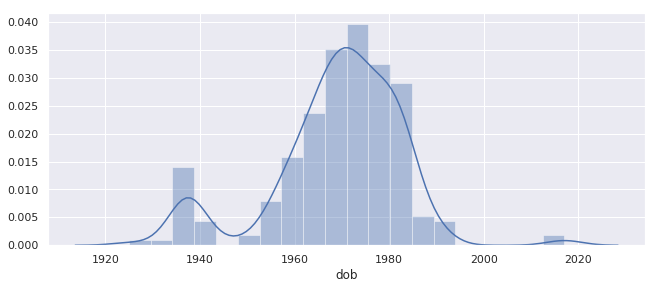

In [50]:
sns.distplot(df.dob.dt.year)

## Check who was born after 1990's

In [52]:
yr_filter = df.dob.dt.year> 1990

In [53]:
df[yr_filter]

,name,title,summary,year,transcript,link,len_transcript,dob,sex
85,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...,42632,2017-01-01,Male
146,Adel Karam,Live From Beirut,Adel Karam goes back to his hometown to appear...,2018,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,https://scrapsfromtheloft.com/2018/03/12/adel-...,35384,2017-01-01,Male


## Fix it

In [54]:
# Vir Das	
# May 31, 1979
df.loc[85, 'dob'] = 'May 31, 1979'

# Adel Karam
# August 20, 1972
df.loc[146, 'dob'] = 'August 20, 1972'

In [55]:
df[yr_filter]

,name,title,summary,year,transcript,link,len_transcript,dob,sex
85,Vir Das,Losing It,"The world's got a lot of problems, but Vir Das...",2018,I lost 80% of my mind. It’s very freeing. You ...,https://scrapsfromtheloft.com/2018/12/15/vir-d...,42632,"May 31, 1979",Male
146,Adel Karam,Live From Beirut,Adel Karam goes back to his hometown to appear...,2018,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,https://scrapsfromtheloft.com/2018/03/12/adel-...,35384,"August 20, 1972",Male


In [56]:
# change dob againt to datetime
df.dob = pd.to_datetime(df.dob)

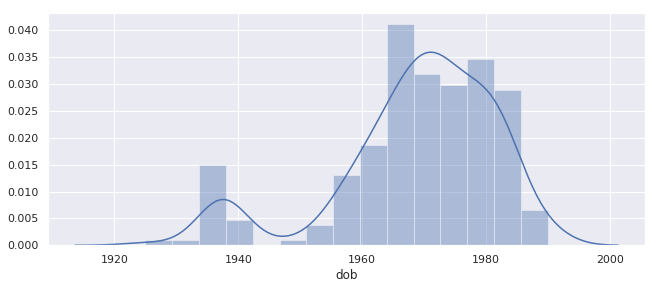

In [57]:
sns.distplot(df.dob.dt.year)

## Find age when special was recorded

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 9 columns):
name              247 non-null object
title             247 non-null object
summary           247 non-null object
year              247 non-null int64
transcript        247 non-null object
link              247 non-null object
len_transcript    247 non-null int64
dob               247 non-null datetime64[ns]
sex               247 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 29.3+ KB


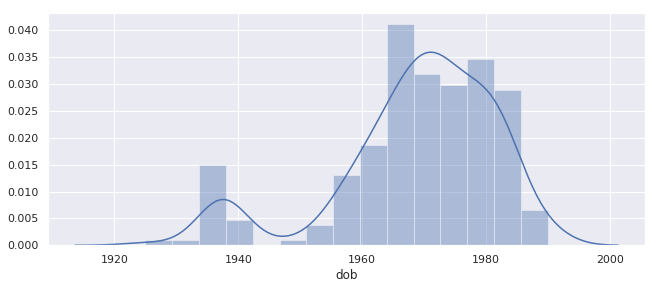

In [59]:
sns.distplot(df.dob.dt.year)

In [60]:
df['age_when_recorded'] = df.year - df.dob.dt.year

In [61]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex,age_when_recorded
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984-01-01,Female,35
1,Nikki Glaser,Perfect,Nikki Glaser brings her sharp wit to her first...,2016,"* * Ooh, ooh, ooh, ooh, ooh, ooh, ooh, ooh * *...",https://scrapsfromtheloft.com/2018/05/16/nikki...,59586,1984-01-01,Female,32
2,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,1968-06-10,Male,51
3,Bill Burr,Why Do I Do This Testo Italiano Completo,"Va bene, grazie, grazie mille. Va bene, Gesù. ...",2008,"Va bene, grazie, grazie mille. Va bene, Gesù. ...",https://scrapsfromtheloft.com/2017/09/08/bill-...,45505,1968-06-10,Male,40
4,Bill Burr,I’M Sorry You Feel That Way,"[cheers and applause] All right, thank you! Th...",2014,"[cheers and applause] All right, thank you! Th...",https://scrapsfromtheloft.com/2017/05/24/bill-...,64608,1968-06-10,Male,46


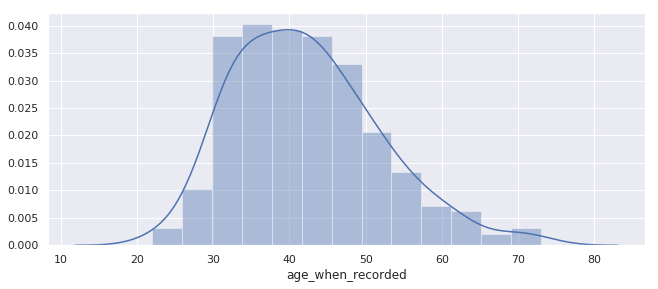

In [62]:
sns.distplot(df.age_when_recorded)

In [63]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex,age_when_recorded
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984-01-01,Female,35
1,Nikki Glaser,Perfect,Nikki Glaser brings her sharp wit to her first...,2016,"* * Ooh, ooh, ooh, ooh, ooh, ooh, ooh, ooh * *...",https://scrapsfromtheloft.com/2018/05/16/nikki...,59586,1984-01-01,Female,32
2,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,1968-06-10,Male,51
3,Bill Burr,Why Do I Do This Testo Italiano Completo,"Va bene, grazie, grazie mille. Va bene, Gesù. ...",2008,"Va bene, grazie, grazie mille. Va bene, Gesù. ...",https://scrapsfromtheloft.com/2017/09/08/bill-...,45505,1968-06-10,Male,40
4,Bill Burr,I’M Sorry You Feel That Way,"[cheers and applause] All right, thank you! Th...",2014,"[cheers and applause] All right, thank you! Th...",https://scrapsfromtheloft.com/2017/05/24/bill-...,64608,1968-06-10,Male,46


## Save

In [64]:
# raw_data
file = '05_clean_data_OCT_19.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [65]:
df.to_csv(data_directory,index=False)

In [66]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex,age_when_recorded
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984-01-01,Female,35
1,Nikki Glaser,Perfect,Nikki Glaser brings her sharp wit to her first...,2016,"* * Ooh, ooh, ooh, ooh, ooh, ooh, ooh, ooh * *...",https://scrapsfromtheloft.com/2018/05/16/nikki...,59586,1984-01-01,Female,32
2,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,1968-06-10,Male,51
3,Bill Burr,Why Do I Do This Testo Italiano Completo,"Va bene, grazie, grazie mille. Va bene, Gesù. ...",2008,"Va bene, grazie, grazie mille. Va bene, Gesù. ...",https://scrapsfromtheloft.com/2017/09/08/bill-...,45505,1968-06-10,Male,40
4,Bill Burr,I’M Sorry You Feel That Way,"[cheers and applause] All right, thank you! Th...",2014,"[cheers and applause] All right, thank you! Th...",https://scrapsfromtheloft.com/2017/05/24/bill-...,64608,1968-06-10,Male,46
